<a href="https://colab.research.google.com/github/shwe-hg/capston-project-on-classification/blob/main/project_on_classification(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEALTH INSURANCE CROSS SELL PREDICTION**

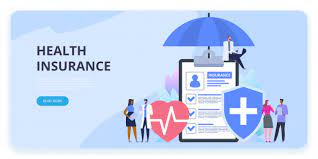

## **Problem Statement** :

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.



### **Dataset Description** :



1.**id** : Unique ID for the customer

2.**Gender**: Gender of the customer

3.**Age** : Age of the customer

4.**Driving_License** : 0=Customer does not have DL, 1= Customer already has DL

5.**Region_Code** : Unique code for the region of the customer

6.**Previously_Insured :** 1= Customer already has Vehicle Insurance, 0= Customer doesn't have Vehicle Insurance

7.**Vehicle_Age** : Age of the Vehicle

8.**Vehicle_Damage** : 1= Customer got his/her vehicle damaged in the past. 0= Customer didn't get his/her vehicle damaged in the past.

9.**Annual_Premium**: The amount customer needs to pay as premium in the year

10.**PolicySalesChannel** : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11.**Vintage** : Number of Days, Customer has been associated with the company

12.**Response** : 1 : Customer is interested, 0 : Customer is not interested

Total no' of rows are 381109 .
Total no' of colums are 12 .

### **Introduction** :

###**Importing Libraries** :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 59.8 MB/s eta 0:00:00


###**Reading Dataset** :

In [7]:
df=pd.read_csv("/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION (1).csv")

###**Data Wrangling** :

Data wrangling is data cleaning or data preprocessing, refers to the process of cleaning, transforming, and preparing raw data to make it suitable for analysis.

let's have a look at dataset :


In [8]:
#first 5 rows of dataset .
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


In [9]:
#last 5 rows of dataset 
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
317298,317299,Female,41.0,1.0,28.0,0.0,1-2 Year,Yes,32578.0,26.0,139.0,0.0
317299,317300,Female,45.0,1.0,29.0,1.0,1-2 Year,No,54696.0,26.0,292.0,0.0
317300,317301,Male,20.0,1.0,5.0,1.0,< 1 Year,Yes,25264.0,160.0,154.0,0.0
317301,317302,Male,37.0,1.0,7.0,0.0,1-2 Year,Yes,35479.0,124.0,69.0,0.0
317302,317303,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# describe will give the summary statistics for numerical columns in a DataFrame
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,317303.00000,317302.000000,317302.000000,317302.000000,317302.000000,317302.000000,317302.000000,317302.000000,317302.000000
mean,158652.00000,38.813421,0.997870,26.393048,0.458015,30548.857010,112.124147,154.361671,0.122952
std,91597.63057,15.496456,0.046108,13.231129,0.498235,17231.163388,54.144039,83.644507,0.328383
min,1.00000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,79326.50000,25.000000,1.000000,15.000000,0.000000,24396.000000,29.000000,82.000000,0.000000
50%,158652.00000,36.000000,1.000000,28.000000,0.000000,31652.000000,133.500000,154.000000,0.000000
75%,237977.50000,49.000000,1.000000,35.000000,1.000000,39377.000000,152.000000,227.000000,0.000000
max,317303.00000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
# the information of rows and columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317303 entries, 0 to 317302
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    317303 non-null  int64  
 1   Gender                317303 non-null  object 
 2   Age                   317302 non-null  float64
 3   Driving_License       317302 non-null  float64
 4   Region_Code           317302 non-null  float64
 5   Previously_Insured    317302 non-null  float64
 6   Vehicle_Age           317302 non-null  object 
 7   Vehicle_Damage        317302 non-null  object 
 8   Annual_Premium        317302 non-null  float64
 9   Policy_Sales_Channel  317302 non-null  float64
 10  Vintage               317302 non-null  float64
 11  Response              317302 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 29.1+ MB


In [12]:
#info about columns 
df.columns 

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [13]:
# shape of dataset
df.shape

(317303, 12)

In [14]:
# making a copy of dataset so that original dataset remain unchanged.
df1=df.copy()

#### **Checking the duplicate values** :

In [15]:
d_value=df1[df1.duplicated()].shape
print("the no of duplicate values is",d_value)

the no of duplicate values is (0, 12)


We found that there is no duplicate values in the above dataset .

####**Missing values / Null values** :

In [16]:
df1.isnull()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
317298,False,False,False,False,False,False,False,False,False,False,False,False
317299,False,False,False,False,False,False,False,False,False,False,False,False
317300,False,False,False,False,False,False,False,False,False,False,False,False
317301,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df1.isnull().sum()

id                      0
Gender                  0
Age                     1
Driving_License         1
Region_Code             1
Previously_Insured      1
Vehicle_Age             1
Vehicle_Damage          1
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
Response                1
dtype: int64

We found that there is no null values in the dataset .

####**Getting the data type of dataset .**

In [18]:
df1.dtypes

id                        int64
Gender                   object
Age                     float64
Driving_License         float64
Region_Code             float64
Previously_Insured      float64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Response                float64
dtype: object